# 3D graph of opinion spread

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


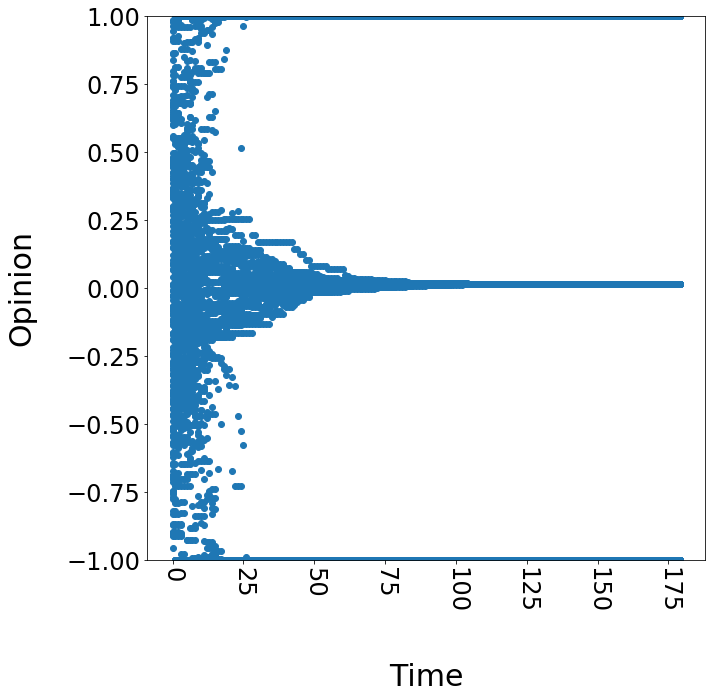

In [18]:
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import csv
from collections import defaultdict, Counter

step = []
opinions = []
cs = []

# model_name = 'BC'

with open('/Users/kennethlomas/Desktop/BristolStockExchange-master/csv_files/opinions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    trial_count = 0
    time_period = 225
    for row in readCSV:
        trial_count = int(row[0][5:])
        ntime=row[1]
        for opinion in row[4:]:
            if opinion != ' ':
                opinions.append(float(opinion))
                step.append((trial_count-1)* time_period + float(ntime))
                
#     previous_time = 0
#     trial_count = 0
#     for row in readCSV:
#         if float(row[0]) >= previous_time:
#             transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
#         else:
#             trial_count += 1
#         previous_time = float(row[0])
                
fig = plt.figure(3, figsize=(10,10))
plt.xlabel('Time', fontsize=30, labelpad=50)
plt.ylabel('Opinion', fontsize=30, labelpad=30)
# plt.title(model_name +" w=0.12", fontsize=30)
# p3 = scatter(step, smiddle, step, slower, step, supper)
ax=plt.axes()
# ax.set_facecolor('midnightblue')
p3 = plt.scatter(step, opinions)
# plt.xlim(xmin=0, xmax=180)
plt.ylim(ymin=-1, ymax=1)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24, rotation=270)
plt.show()



In [ ]:
# read csv file and store opinions and step
step = []
opinions = []


with open('/Users/kennethlomas/Desktop/BristolStockExchange-master/csv_files/opinions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    trial_count = 0
    time_period = 225
    for row in readCSV:
        trial_count = int(row[0][5:])
        ntime=row[1]
        for opinion in row[4:]:
            if opinion != ' ':
                opinions.append(float(opinion))
                step.append((trial_count-1)* time_period + float(ntime))

print("read data done")
                
# round opinions to 2 dp    
Z = []
rounded_opinions = ["{:.1f}".format(o) for o in opinions]

print("rounded opinions")
# store opinion spread counts in dictionary counter
# this needs improving as it's currently far too slow
counter = {}
cnt = Counter()
for step_num in range(int(max(step))):
    cnt = Counter({x:0 for x in cnt})
    for o in range(len(rounded_opinions)):
        if step[o] == step_num:
            cnt[rounded_opinions[o]] += 1
    counter[step_num] = cnt
print("counting done")

# X = step
# Y = opinions
# opinions = ["{:.1f}".format(o) for o in opinions]

        
# Make data.
X = np.arange(-1, 1.1, 0.01)
n_opinions = len(X)
n_steps = int(max(step))
Y = np.arange(0, n_steps+1, 1)
X, Y = np.meshgrid(X, Y)

def f(x, y):
    value = counter[y][str(x)]
    return value

Z = np.array([0]*n_opinions)
maximum_z = 1
for i in range(n_steps):
    
    temp = np.zeros(n_opinions)
    
    for j in range(n_opinions):
        
        x_part = X[i][j]
        y_part = Y[i][j]
        temp[j] = (f(x_part, y_part))
        
        if temp[j] > maximum_z: maximum_z = temp[j]
        
    Z = np.vstack((Z, temp))
    
label_font_size = 45
width = 15

print("normal plot done")

# FIRST FIGURE WITH COLOR MAP
# ============================================

print("first 3d plot started")

fig = plt.figure(figsize=(width*2,width))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')

cmap = cm.cool
cmap.set_under(color='white') 
# norm = colors.Normalize(vmin=0, vmax=30)
# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, vmin=0.0000001, vmax=200, linewidth=0, antialiased=False)

# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlim(1, -1)
# ax.set_ylim(0, 180)
ax.set_zlim(0, maximum_z + 5)
ax.set_xlabel('Opinion', fontsize=label_font_size, labelpad=30)
ax.set_ylabel('Time', fontsize=label_font_size, labelpad=30)
ax.set_zlabel('Number of experts', fontsize=label_font_size, labelpad=35)

plt.xticks([1,0,-1], fontsize=30)
plt.yticks([0, n_steps+1], fontsize=30)
ax.set_zticks([0, maximum_z])
# ax.set_zticks([0, 23.11, 52])
# print(maximum_z)
ax.zaxis.set_tick_params(labelsize=30)
ax.tick_params(axis='z', which='major', pad=15)

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5, orientation='horizontal')
# plt.colorbar(ticks=range(6), label='digit value')
cbaxes = fig.add_axes([0.1, 0.25, 0.03, 0.5]) 
cb = plt.colorbar(surf, cax = cbaxes)  
cb.ax.tick_params(labelsize=label_font_size//1.5)
print("first 3d plot done")

# SECOND FIGURE WIREFRAME
# ============================================

print("second 3d plot started")

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rcount=50, ccount=50)
# ax.plot_wireframe(X, Y, Z, cmap=cm.cool)
# colors = cm.cool
# surf = ax.plot_surface(X, Y, Z, rcount=50, ccount=50,
#                        facecolors=colors, shade=False)
# fig.colorbar(surf, shrink=0.5, aspect=5, orientation='horizontal')
# surf.set_facecolor((0,0,0,0))

ax.set_xlim(1, -1)
# ax.set_ylim(0, 180)
ax.set_zlim(0, maximum_z + 5)
ax.set_xlabel('Opinion', fontsize=label_font_size, labelpad=30)
ax.set_ylabel('Time', fontsize=label_font_size, labelpad=30)
ax.set_zlabel('Number of experts', fontsize=label_font_size, labelpad=35)
# fig.tight_layout()

plt.xticks([1,0,-1], fontsize=30)
plt.yticks([0, n_steps+1], fontsize=30)
# ax.set_zticks(fontsize=24)
ax.set_zticks([0, maximum_z])
ax.tick_params(axis='z', which='major', pad=15)
ax.zaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()


read data done
rounded opinions
counting done
normal plot done
first 3d plot started
first 3d plot done
second 3d plot started


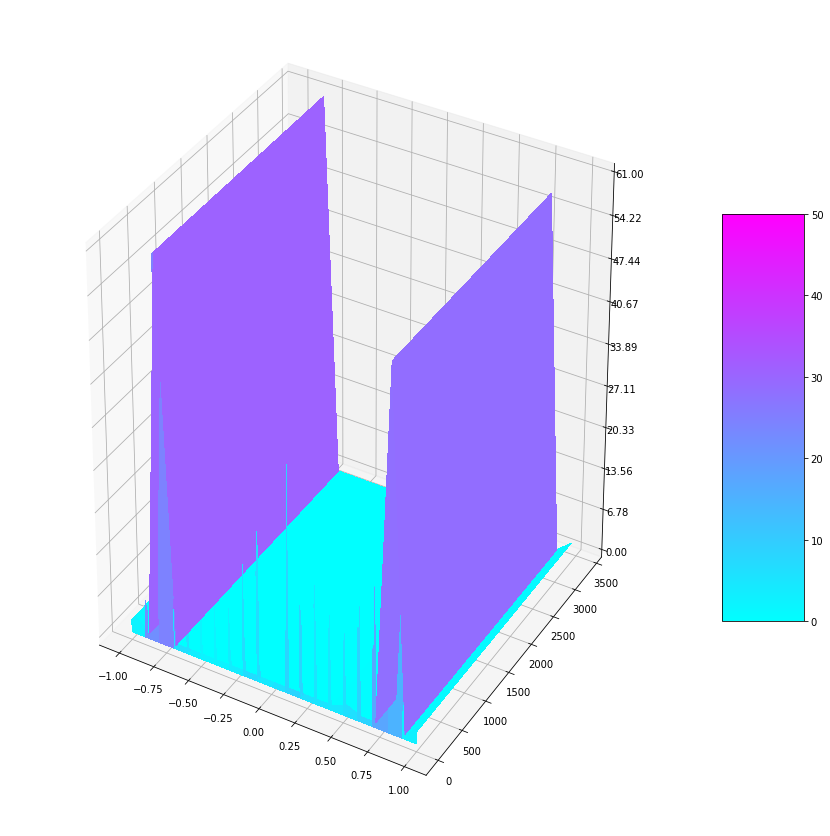

In [105]:
# read csv file and store opinions and step
step = []
opinions = []


with open('/Users/kennethlomas/Desktop/BristolStockExchange-master/csv_files/opinions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    trial_count = 0
    time_period = 225
    for row in readCSV:
        trial_count = int(row[0][5:])
        ntime=row[1]
        for opinion in row[4:]:
            if opinion != ' ':
                opinions.append(float(opinion))
                step.append((trial_count-1)* time_period + float(ntime))
                
                
# round opinions to 2 dp    
Z = []
rounded_opinions = ["{:.1f}".format(o) for o in opinions]


# store opinion spread counts in dictionary counter
counter = {}
cnt = Counter()
for step_num in range(int(max(step))):
    cnt = Counter({x:0 for x in cnt})
    for o in range(len(rounded_opinions)):
        if step[o] == step_num:
            cnt[rounded_opinions[o]] += 1
    counter[step_num] = cnt
    

# Make data.
X = np.arange(-1, 1.1, 0.1)
n_opinions = len(X)
n_steps = int(max(step))
Y = np.arange(0, n_steps+1, 1)
X, Y = np.meshgrid(X, Y)

def f(x, y):
    value = counter[y][str(x)]
    return value

Z = np.array([0]*n_opinions)
maximum_z = 1
for i in range(n_steps):
    
    temp = np.zeros(n_opinions)
    
    for j in range(n_opinions):
        
        x_part = X[i][j]
        y_part = Y[i][j]
        temp[j] = (f(x_part, y_part))
        
        maximum_z = max(maximum_z, temp[j])
        
    Z = np.vstack((Z, temp))

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

cmap = cm.cool
norm = colors.Normalize(vmin=0, vmax=50)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, norm=norm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label='Some Units')

plt.show()

# Animation

In [ ]:
fig = figure(4, figsize=(12,12))
ax = axes()
x, y = [],[]
xlabel('Time', fontsize=24)
ylabel('Opinion', fontsize=24)
title("BC mu=0.2 delta=0.4 pe=1.0 Positive Extreme", fontsize=24)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_facecolor('midnightblue')

# cmap = matplotlib.colors.ListedColormap(["red","orange","gold","gold", "gold","gold", "orange","red"])
sc = ax.scatter(x,y,c='gold', s=10)

xlim(0,180)
ylim(-1,1)


def animate(i):
    
    for j in range(len(steps)):
        if steps[j] == i:
            x.append(steps[j])
            y.append(opinions[j])
        
    sc.set_offsets(np.c_[x,y])

anim = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=180, interval=100, repeat=True) 


anim.save('opinion.gif', writer='imagemagick')

In [ ]:
transactions = []

with open('transactions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        transactions.append([float(row[0]), float(row[1])])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

fig = figure(5, figsize=(12,12))
ax = axes(xlim=(0, 180), ylim=(30, 200))
x, y = [],[]
xlabel('Time', fontsize=24)
ylabel('Price', fontsize=24)
title("Transactions", fontsize=24)
xticks(fontsize=16)
yticks(fontsize=16)
ax.set_facecolor('midnightblue')

grid(linestyle='-', linewidth=1)

line, = plot([], [], 'green', linewidth=3)

def animate(i):
    
    for j in range(len(time)):
        if time[j] > i and time[j] < (i+1):
            x.append(time[j])
            y.append(price[j])
    
    line.set_data(x,y)

    return line,

anim = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=180, interval=100, repeat=True, blit=True) 


anim.save('transactions.gif', writer='imagemagick')
show()